<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/10_14_1_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### https://keras.io/ko/applications/
!pip uninstall -y keras
!pip uninstall -y tensorflow

Found existing installation: Keras 2.2.4
Uninstalling Keras-2.2.4:
  Successfully uninstalled Keras-2.2.4
Found existing installation: tensorflow 1.14.0
Uninstalling tensorflow-1.14.0:
  Successfully uninstalled tensorflow-1.14.0


### https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

In [ ]:
!pip install -r ./requirements.txt

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Using cached tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (109.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
# load the model
model = VGG16(include_top=True,
    weights="imagenet",
    classes=1000)

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
plot_model(model, to_file='vgg.png')

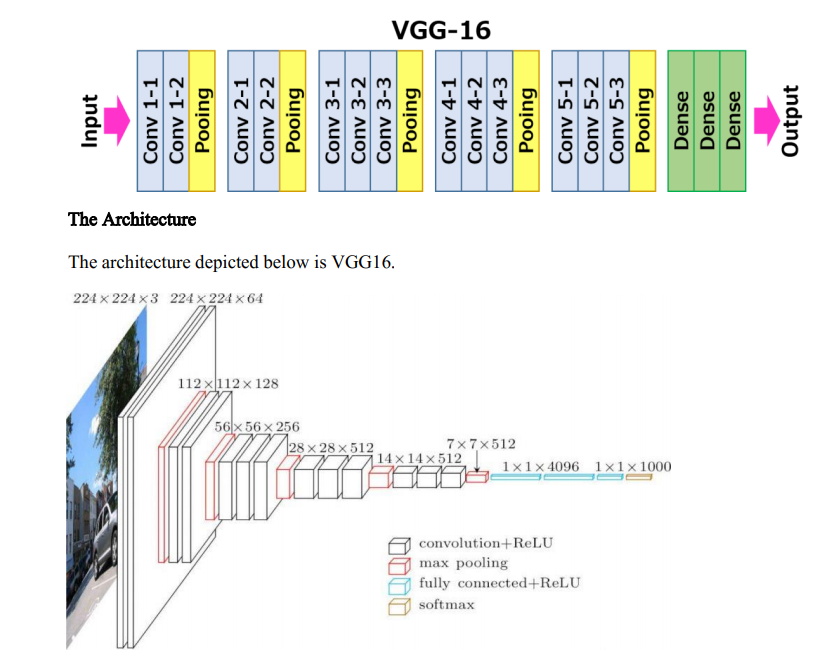

In [ ]:
# load an image from file
img_path = "penguins7.jpg"#otter1.jpg
image = load_img(img_path, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
# reshape data for the model
# We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.
# The network expects one or more images as input; 
# that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability

In [ ]:
type(yhat)

numpy.ndarray

In [ ]:
yhat.shape#천 개의 값이 리턴

(1, 1000)

In [ ]:
yhat

array([[9.06537224e-16, 6.26906635e-14, 4.07087368e-13, 1.41418480e-13,
        2.15536811e-12, 3.85820839e-15, 7.63893953e-15, 1.98146610e-10,
        4.53041354e-11, 7.06442717e-13, 1.35121991e-09, 1.50867185e-09,
        2.46053590e-12, 7.50070173e-10, 9.40464883e-14, 8.82247053e-11,
        1.68830585e-08, 6.10350451e-11, 1.73522594e-07, 3.49826244e-11,
        3.89530985e-09, 1.55138558e-11, 8.70761935e-11, 1.29125211e-10,
        3.07085696e-14, 9.02545860e-14, 7.09692696e-15, 8.15055251e-15,
        4.54098513e-15, 6.55044324e-14, 5.89476910e-15, 7.25179264e-16,
        6.21880314e-16, 1.03887888e-14, 6.81585390e-14, 7.22385527e-15,
        1.70356859e-14, 2.73040409e-16, 8.40684097e-15, 1.63125982e-13,
        9.51705620e-13, 1.02912055e-14, 2.96417540e-13, 1.29666874e-15,
        7.95958893e-15, 5.56710668e-15, 1.08299512e-13, 2.39869672e-16,
        7.79593539e-15, 3.08617674e-14, 5.69753959e-15, 1.08602647e-15,
        1.13711436e-13, 3.46931414e-13, 9.19322398e-14, 4.711908

In [ ]:
yhat.max()

0.99994886

In [ ]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability

In [ ]:
label0 = label[0][0]
label1 = label[0][4]##
# print the classification
print('%s %s (%.2f%%)' % (label0[0], label0[1], label0[2]*100))
print('%s %s (%.2f%%)' % (label1[0], label1[1], label1[2]*100))##

n02056570 king_penguin (99.99%)
n02091134 whippet (0.00%)


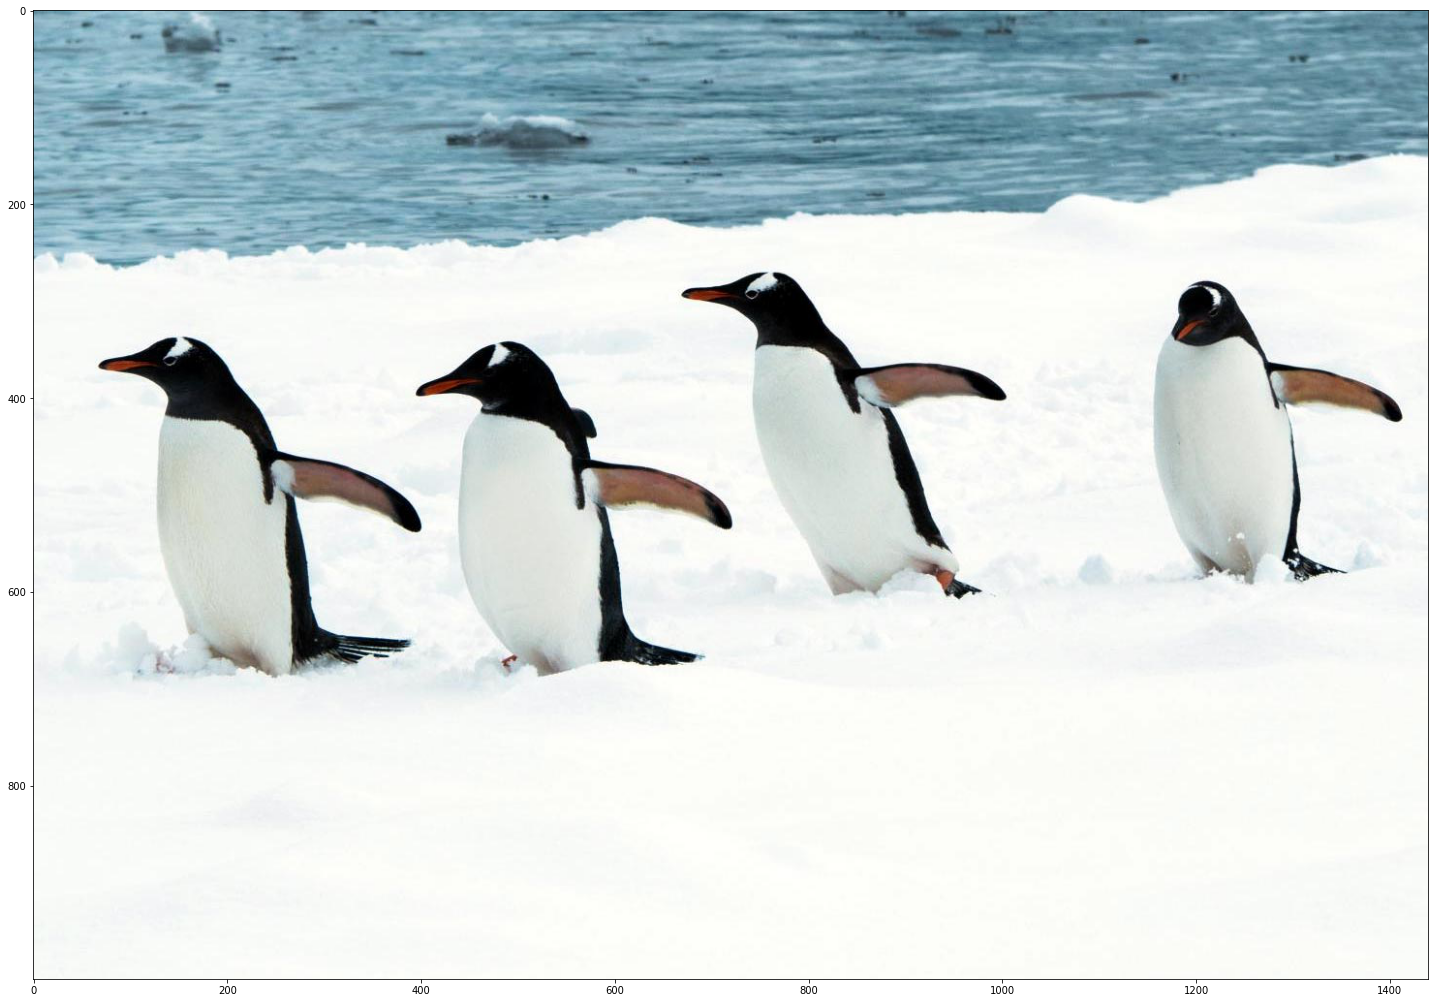

In [ ]:
import os
import sys
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

image = Image.open(img_path).convert("RGB")

plt.figure(figsize=(25,20))
plt.imshow(image)
plt.show()
plt.close()#펭귄이라는 클래스를 가짐